In [1]:
# import spacec first
import spacec as sp

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

#import standard packages
import os
import scanpy as sc

sc.settings.set_figure_params(dpi=80, facecolor='white')

/dss/dsshome1/00/ge65tib2/miniconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-09 17:53:20.621324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-09 17:53:20.621372: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
INFO:root: * TissUUmaps version: 3.1.1.6


In [2]:
# Specify the path to the data
root_path = "/dss/dsshome1/00/ge65tib2/Spacec/" # replace with your path
data_path = root_path + 'example_data/raw/' # where the data is stored

# where you want to store the output
output_dir = root_path + 'example_data/output/'
os.makedirs(output_dir, exist_ok=True)

In [3]:
# Loading the anndata from notebook 3 [cell type or cluster annotation is necessary for the step]
adata = sc.read(output_dir + 'adata_nn_demo_annotated.h5ad')
adata

AnnData object with n_obs × n_vars = 13530 × 39
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse', 'cell_type_coarse_subcluster', 'cell_type_coarse_f', 'cell_type_coarse_f_subcluster', 'cell_type'
    uns: 'cell_type_coarse_f_subcluster', 'cell_type_coarse_subcluster', 'cell_type_colors', 'dendrogram_leiden_1', 'leiden_1', 'leiden_1_colors', 'leiden_1_subcluster', 'neighbors', 'umap', 'unique_region_colors'
    obsm: 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

Starting: 1/2 : 2_4
Finishing: 1/2 : 2_4 0.05673098564147949 0.056810855865478516
Starting: 2/2 : 5_5
Finishing: 2/2 : 5_5 0.03529930114746094 0.09218668937683105


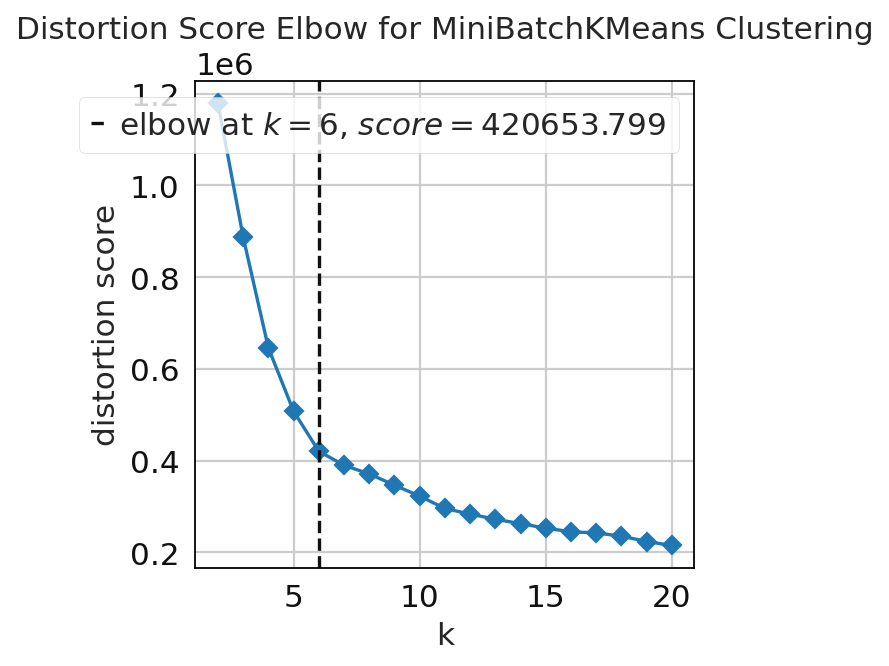

In [4]:
# compute for CNs
# tune k and n_neighborhoods to obtain the best result
adata = sp.tl.neighborhood_analysis(
    adata, 
    unique_region = "unique_region", 
    cluster_col = "cell_type", 
    X = 'x', Y = 'y',
    k = 20, # k nearest neighbors
    n_neighborhoods = 20, #number of CNs
    elbow = True)

In [5]:
# compute for CNs
# tune k and n_neighborhoods to obtain the best result
adata = sp.tl.neighborhood_analysis(
    adata, 
    unique_region = "unique_region", # regions or samples
    cluster_col = "cell_type", # derive clusters from this column
    X = 'x', Y = 'y', # spatial coordinates
    k = 20, # k nearest neighbors
    n_neighborhoods = 6, # number of CNs (or max number of CNs for elbow plot)
    elbow = False) # if True, will plot the elbow plot

Starting: 1/2 : 2_4
Finishing: 1/2 : 2_4 0.021143674850463867 0.021239757537841797
Starting: 2/2 : 5_5
Finishing: 2/2 : 5_5 0.03630566596984863 0.057615041732788086


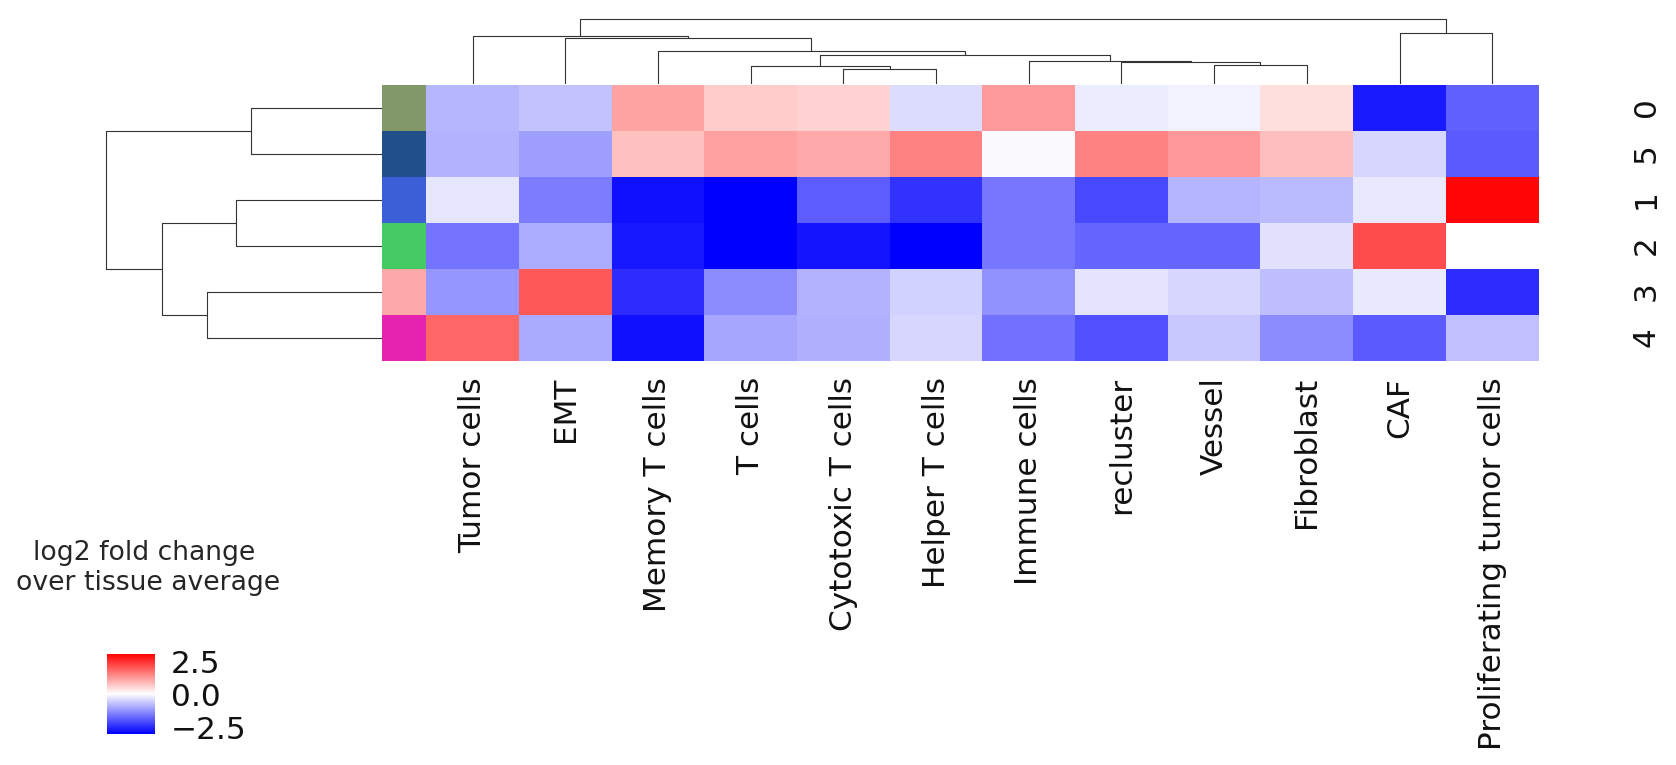

In [6]:
# to better visualize the cellular neighborhood (CN), we choose a color palette
# but if you set palette = None in the following function, it will randomly generate a palette for you
cn_palette = {
    0: '#829868',
    1: '#3C5FD7',
    2: '#44CB63',
    3: '#FDA9AA',
    4: '#E623B1',
    5: '#204F89'}

# save the palette in the adata
adata.uns['CN_k20_n6_colors'] = cn_palette.values()

# plot CN to see what cell types are enriched per CN so that we can annotate them better
sp.pl.cn_exp_heatmap(
    adata, # anndata
    cluster_col = "cell_type", # cell type column
    cn_col = "CN_k20_n6", # CN column
    palette=cn_palette, # color palette for CN
    savefig = False, # save the figure
    output_dir = output_dir, # output directory
    rand_seed = 1 # random seed for reproducibility
)

x            y CN_k20_n6 condition
0     1420.232000   329.624000         5  pancreas
1     1427.107143   340.437500         5  pancreas
2     1364.210526   342.118421         5  pancreas
3     1290.170732   342.268293         4  pancreas
5     1342.777778   346.066667         5  pancreas
...           ...          ...       ...       ...
5956  1549.162651  2363.566265         5  pancreas
5957  1194.500000  2365.000000         2  pancreas
5958  1345.189189  2366.972973         5  pancreas
5959  1422.788732  2372.126761         5  pancreas
5960  1412.121212  2374.181818         5  pancreas

[4735 rows x 4 columns]

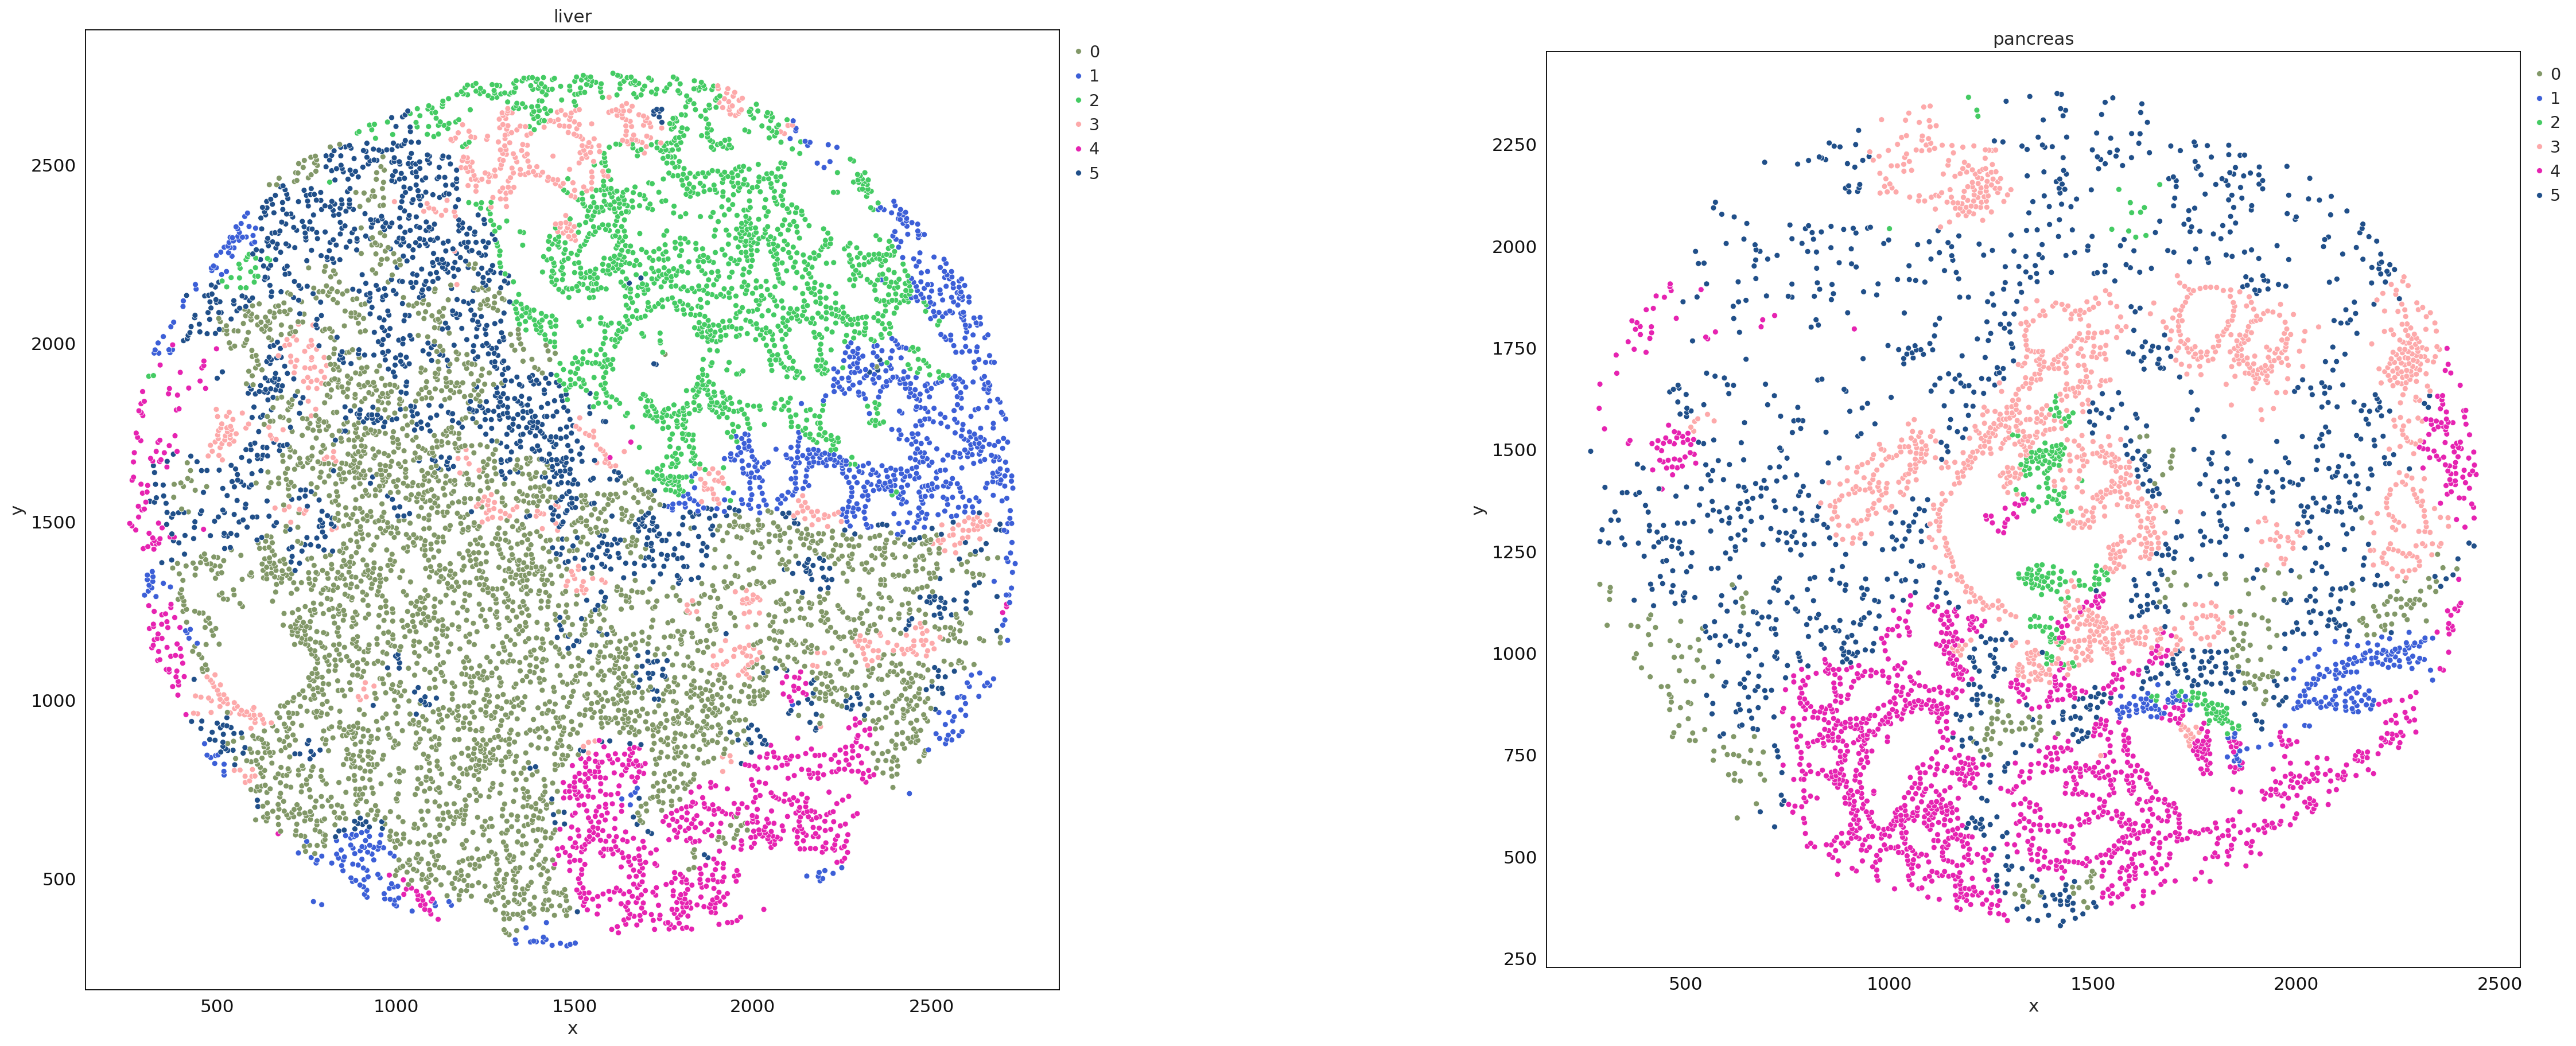

In [7]:
sp.pl.catplot(
    adata, 
    color = "CN_k20_n6", # specify group column name here (e.g. celltype_fine)
    unique_region = "condition", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=2, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=True, # save figure as pdf
    output_fname = "CN_plot", # change it to file name you prefer when saving the figure
    output_dir=output_dir, # specify output directory here (if savefig=True)
    figsize= 17, # specify figure size here
    size = 20) # specify size of the points in the plot

In [9]:
# Define neighborhood annotation for every cluster ID
neighborhood_annotation = {
    0: 'Immune Infiltration Zone',
    1: 'Proliferative Tumor Core', 
    2: 'CAF Niche',
    3: 'EMT',
    4: 'Tumor Core', 
    5: 'Effector T cell Zone',
    }


adata.obs['CN_k20_n6_annot'] = (
    adata.obs['CN_k20_n6']
    .map(neighborhood_annotation)
    .astype('category')
)

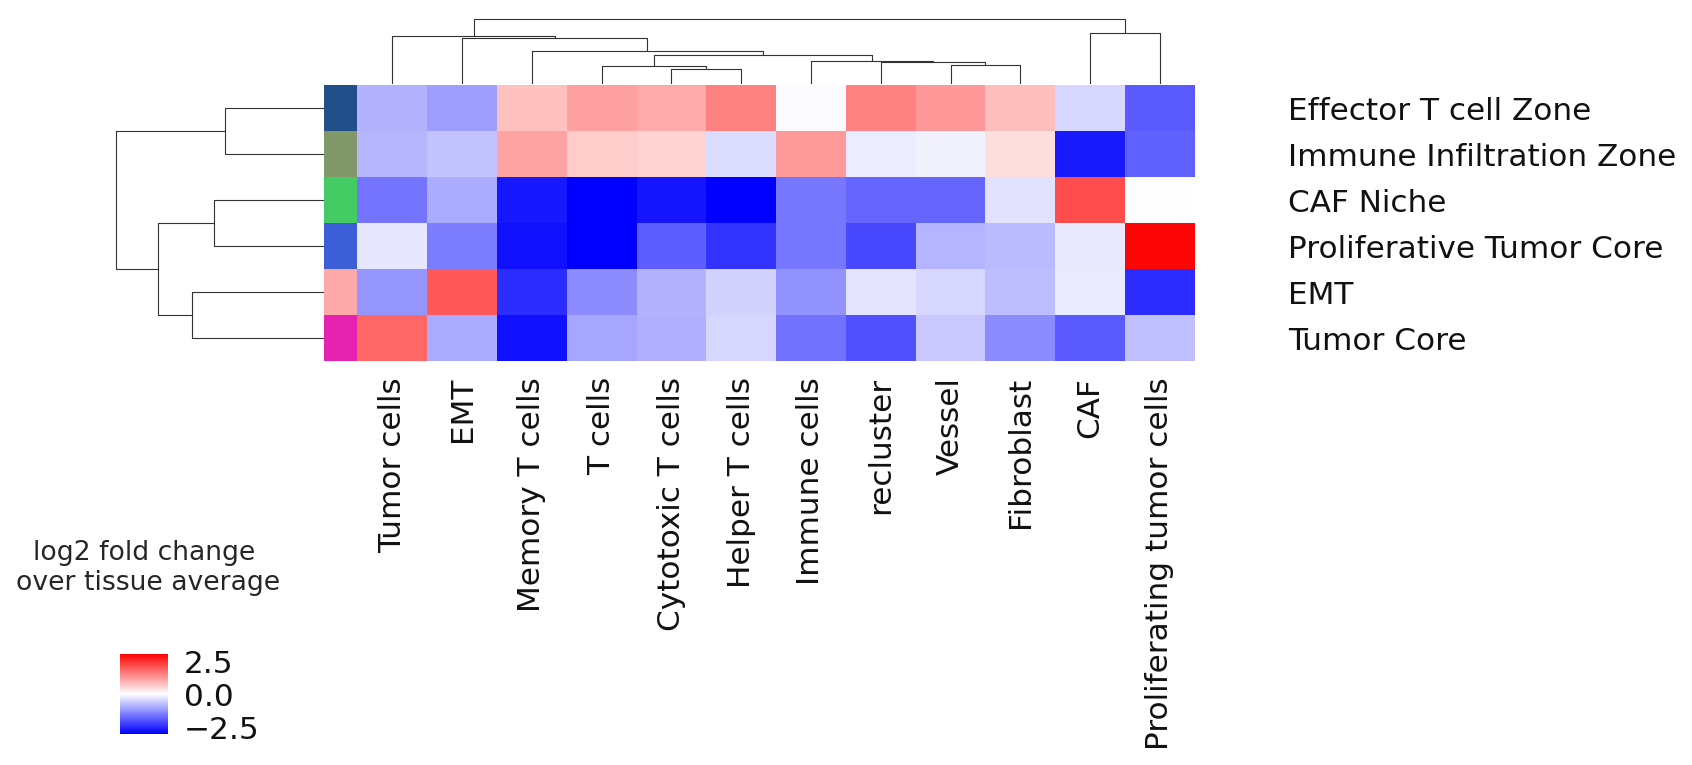

In [10]:
# match the color of the annotated CN to the original CN
cn_annt_palette = {neighborhood_annotation[key]: value for key, value in cn_palette.items()}

pass

# replotting with CN annotation
sp.pl.cn_exp_heatmap(
    adata, 
    cluster_col = "cell_type", 
    cn_col = "CN_k20_n6_annot",
    palette = cn_annt_palette, #if None, there is randomly generated in the code 
    savefig=True,
    output_fname = "annotated_CN_original_CN",
    output_dir = output_dir,
)

In [11]:
# Convert dict_values to a list
adata.uns['CN_k20_n6_colors'] = list(adata.uns['CN_k20_n6_colors'])

# Save the AnnData object
adata.write(output_dir + 'adata_nn_demo_annotated_cn.h5ad')

In [14]:
# We will look at the spatial context maps separately for each condition
adata_pancreas = adata[adata.obs['condition'] == 'pancreas']
adata_liver = adata[adata.obs['condition'] == 'liver']

Starting: 1/1 : 0
Finishing: 1/1 : 0 0.04940199851989746 0.04941415786743164
10 0.025554382259767694


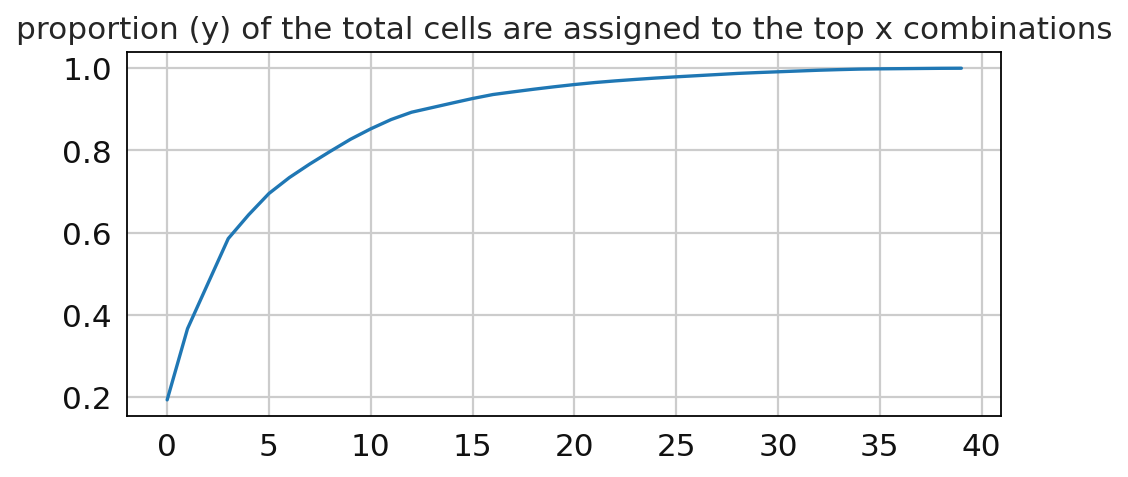

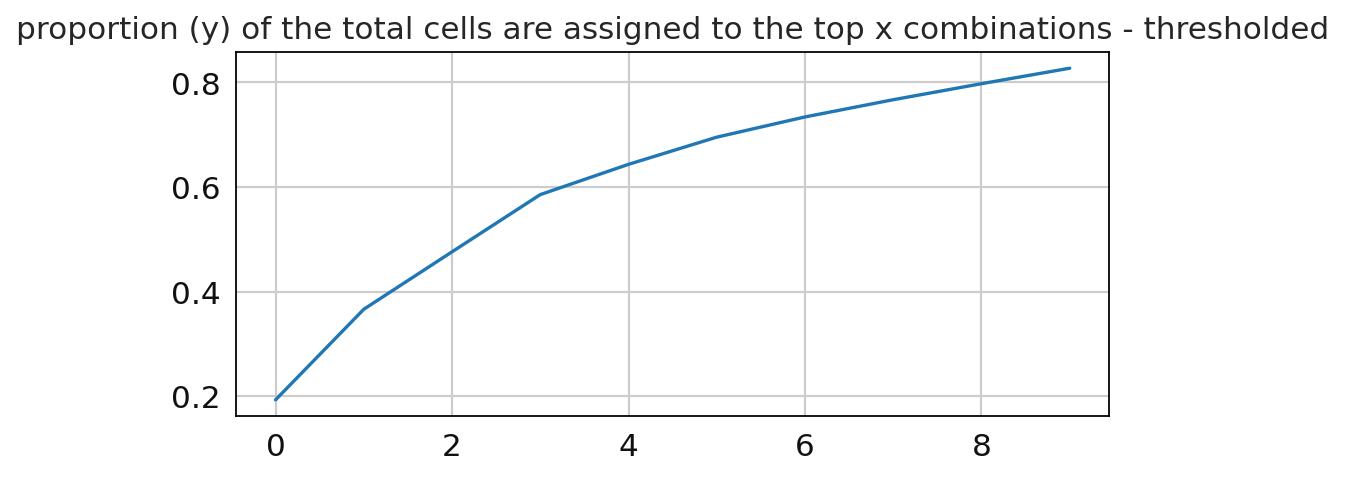

In [15]:
#adata_pancreas
cnmap_dict_pancreas = sp.tl.build_cn_map(
    adata = adata_pancreas, # adata object
    cn_col = "CN_k20_n6_annot",# column with CNs
    palette = cn_annt_palette, # color dictionary
    unique_region = 'region_num',# column with unique regions
    k = 70, # number of neighbors
    X='x', Y='y',  # coordinates
    threshold = 0.85, # threshold for percentage of cells in CN
    per_keep_thres = 0.85,) # threshold for percentage of cells in CN

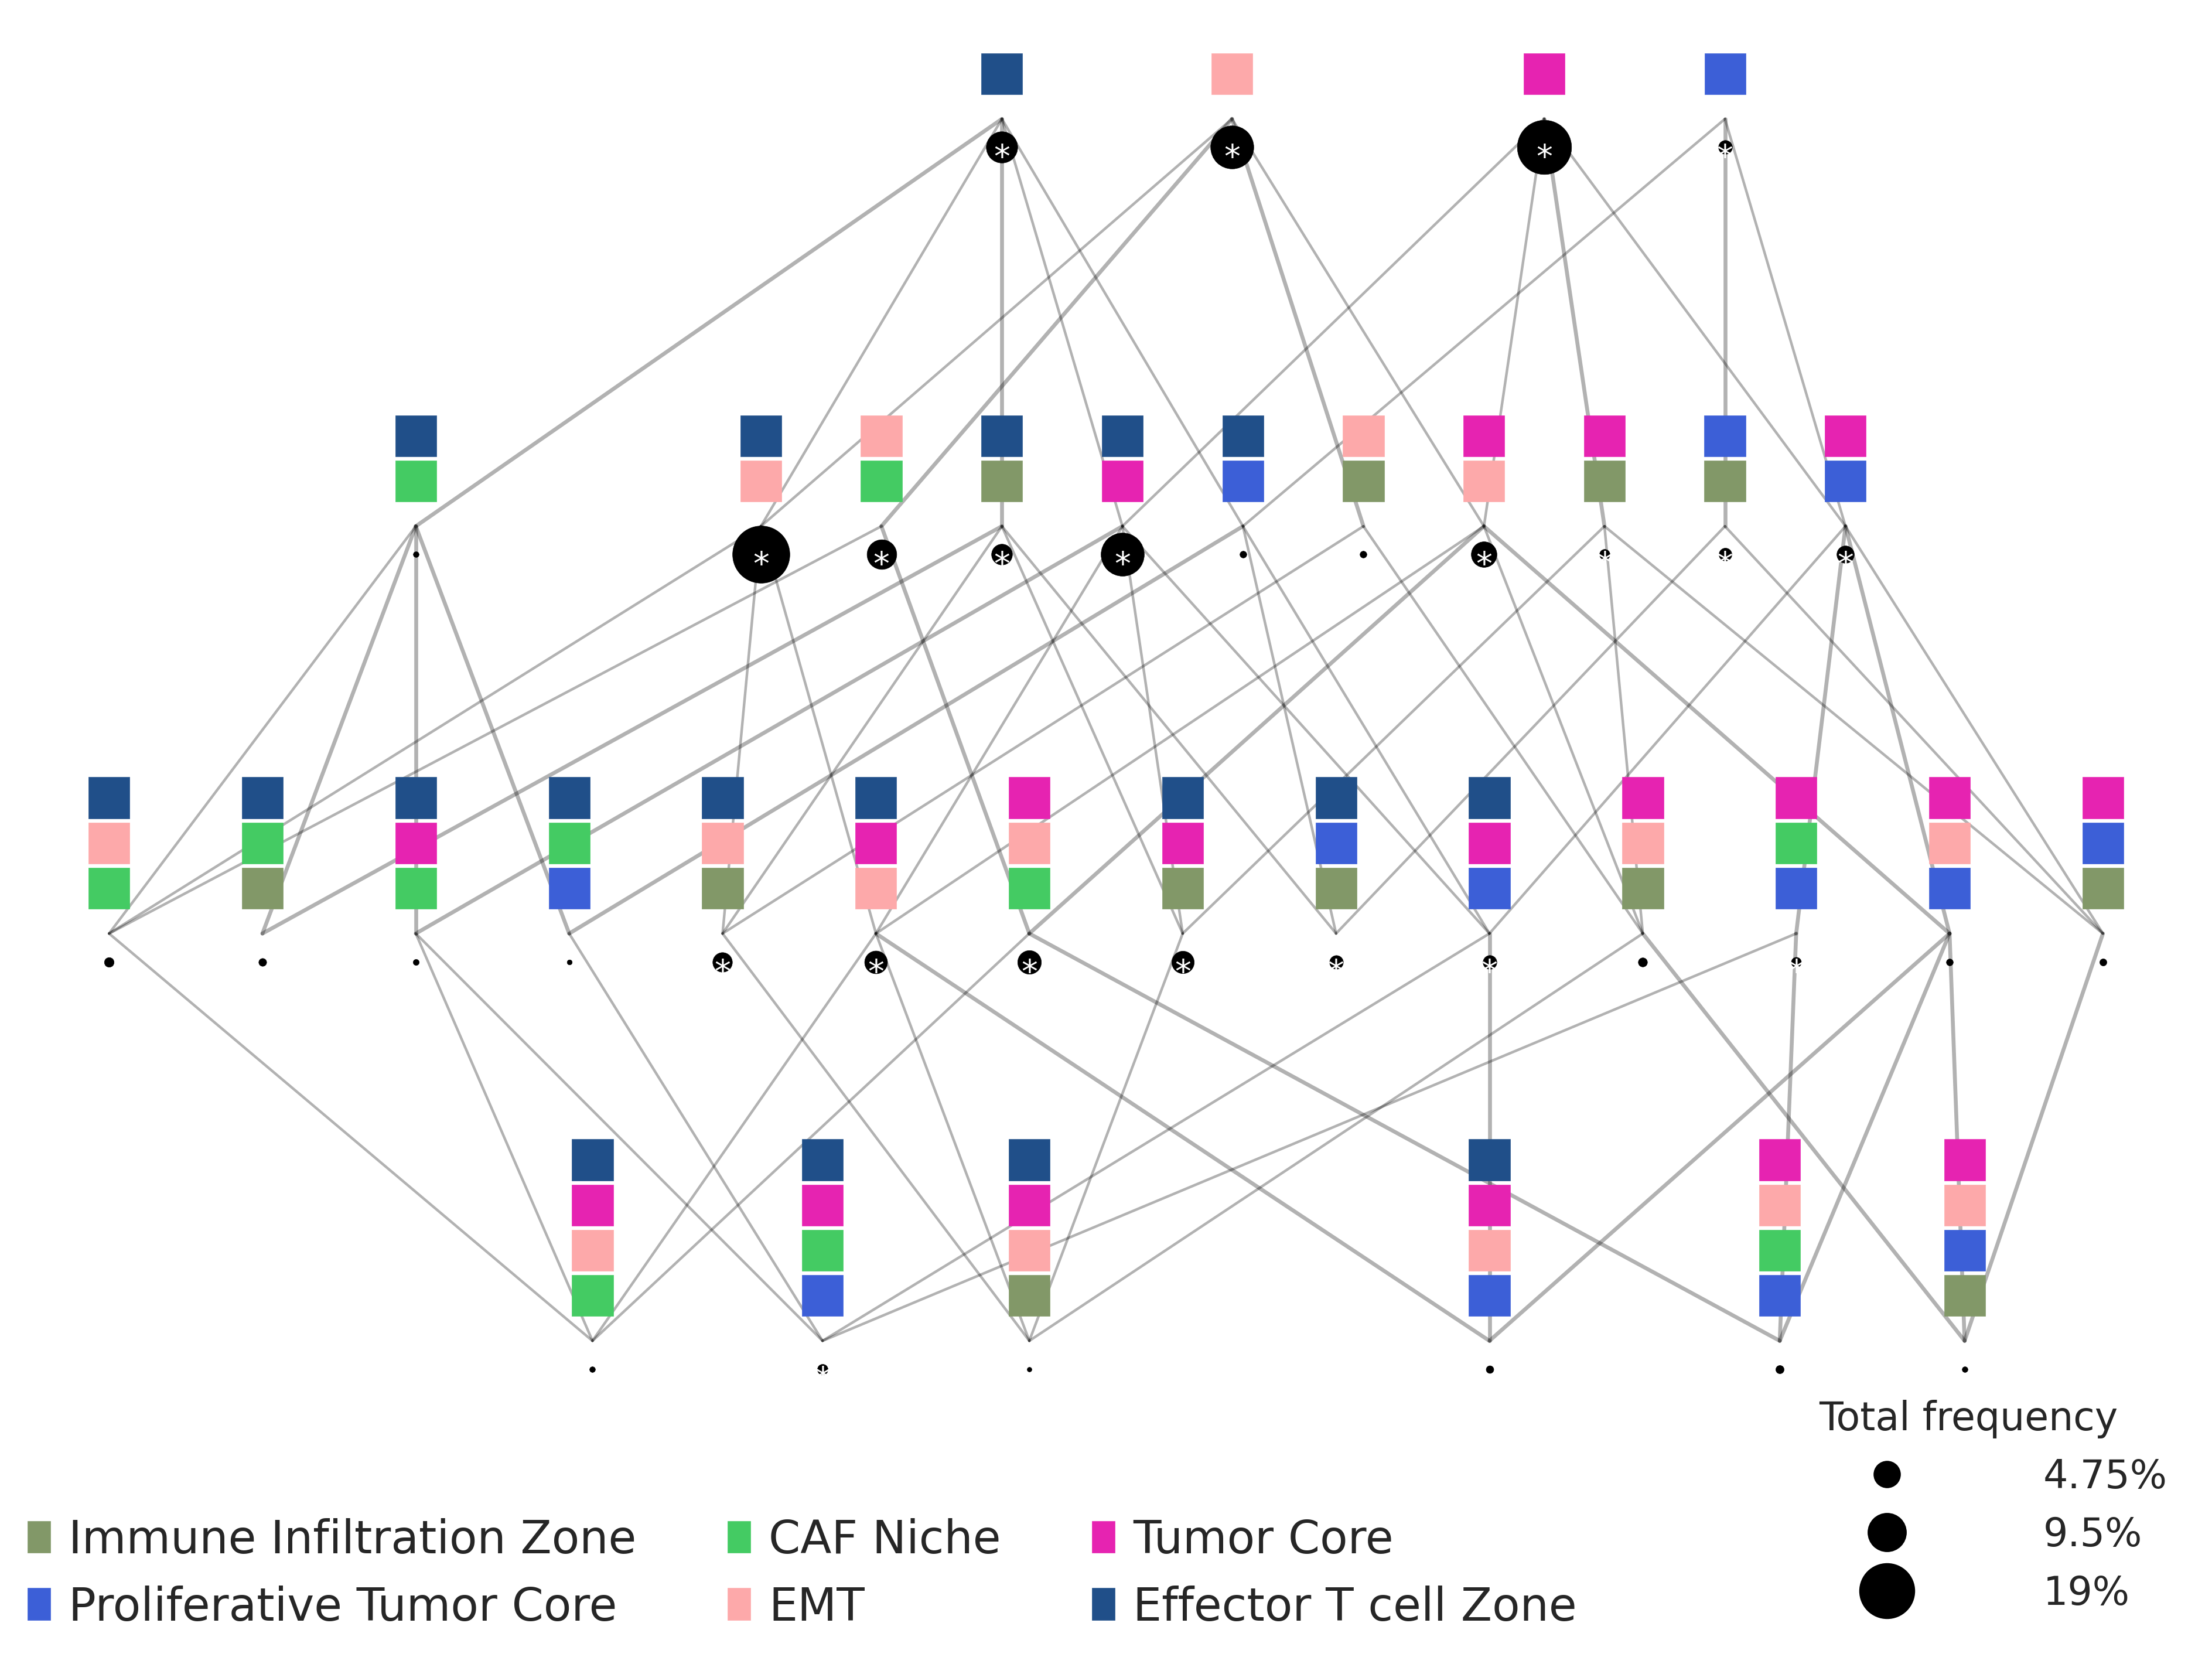

In [19]:
# Compute for the frequency of the CNs and paly around with the threshold
sp.pl.cn_map(cnmap_dict = cnmap_dict_pancreas, # dictionary from the previous step
        adata = adata_pancreas, # adata object
        cn_col = "CN_k20_n6_annot", # column with CNs used to color the plot
        palette = cn_annt_palette, # color dictionary
        figsize=(30, 20), # figure size
        savefig=True, # save figure as pdf
        output_fname = "cnmap_pancreas", # change it to file name you prefer when saving the figure
        output_dir= output_dir # specify output directory here (if savefig=True)
    )

Starting: 1/1 : 1
Finishing: 1/1 : 1 0.09085559844970703 0.09086155891418457
12 0.01648664013644119


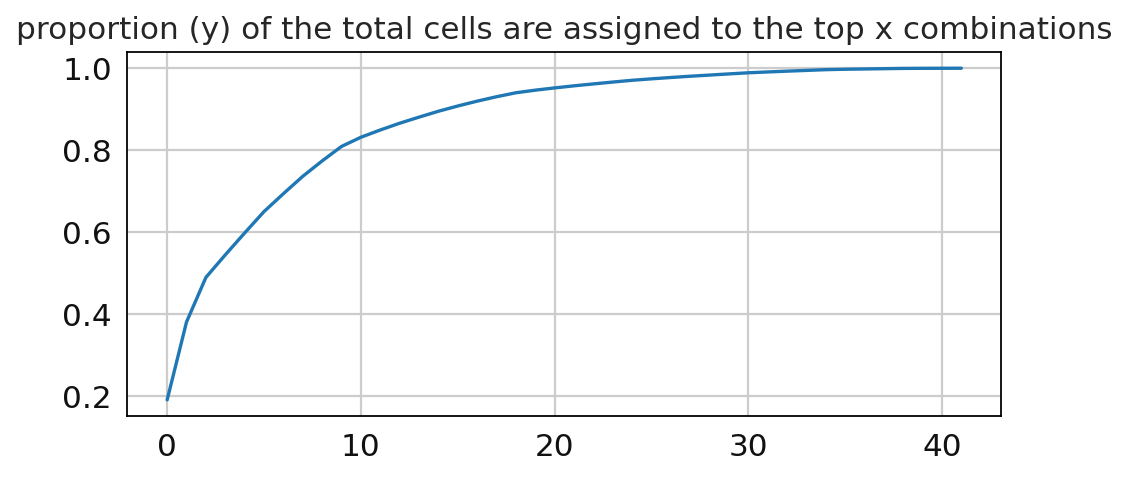

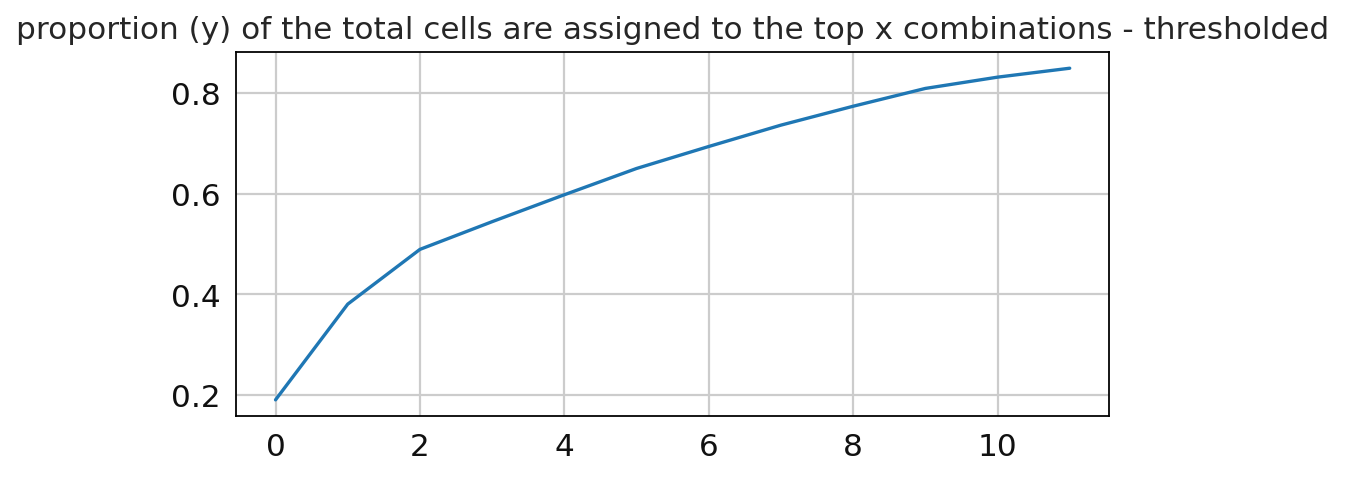

In [20]:
#adata_pancreas
cnmap_dict_liver = sp.tl.build_cn_map(
    adata = adata_liver, # adata object
    cn_col = "CN_k20_n6_annot",# column with CNs
    palette = cn_annt_palette, # color dictionary
    unique_region = 'region_num',# column with unique regions
    k = 70, # number of neighbors
    X='x', Y='y',  # coordinates
    threshold = 0.85, # threshold for percentage of cells in CN
    per_keep_thres = 0.85,) # threshold for percentage of cells in CN

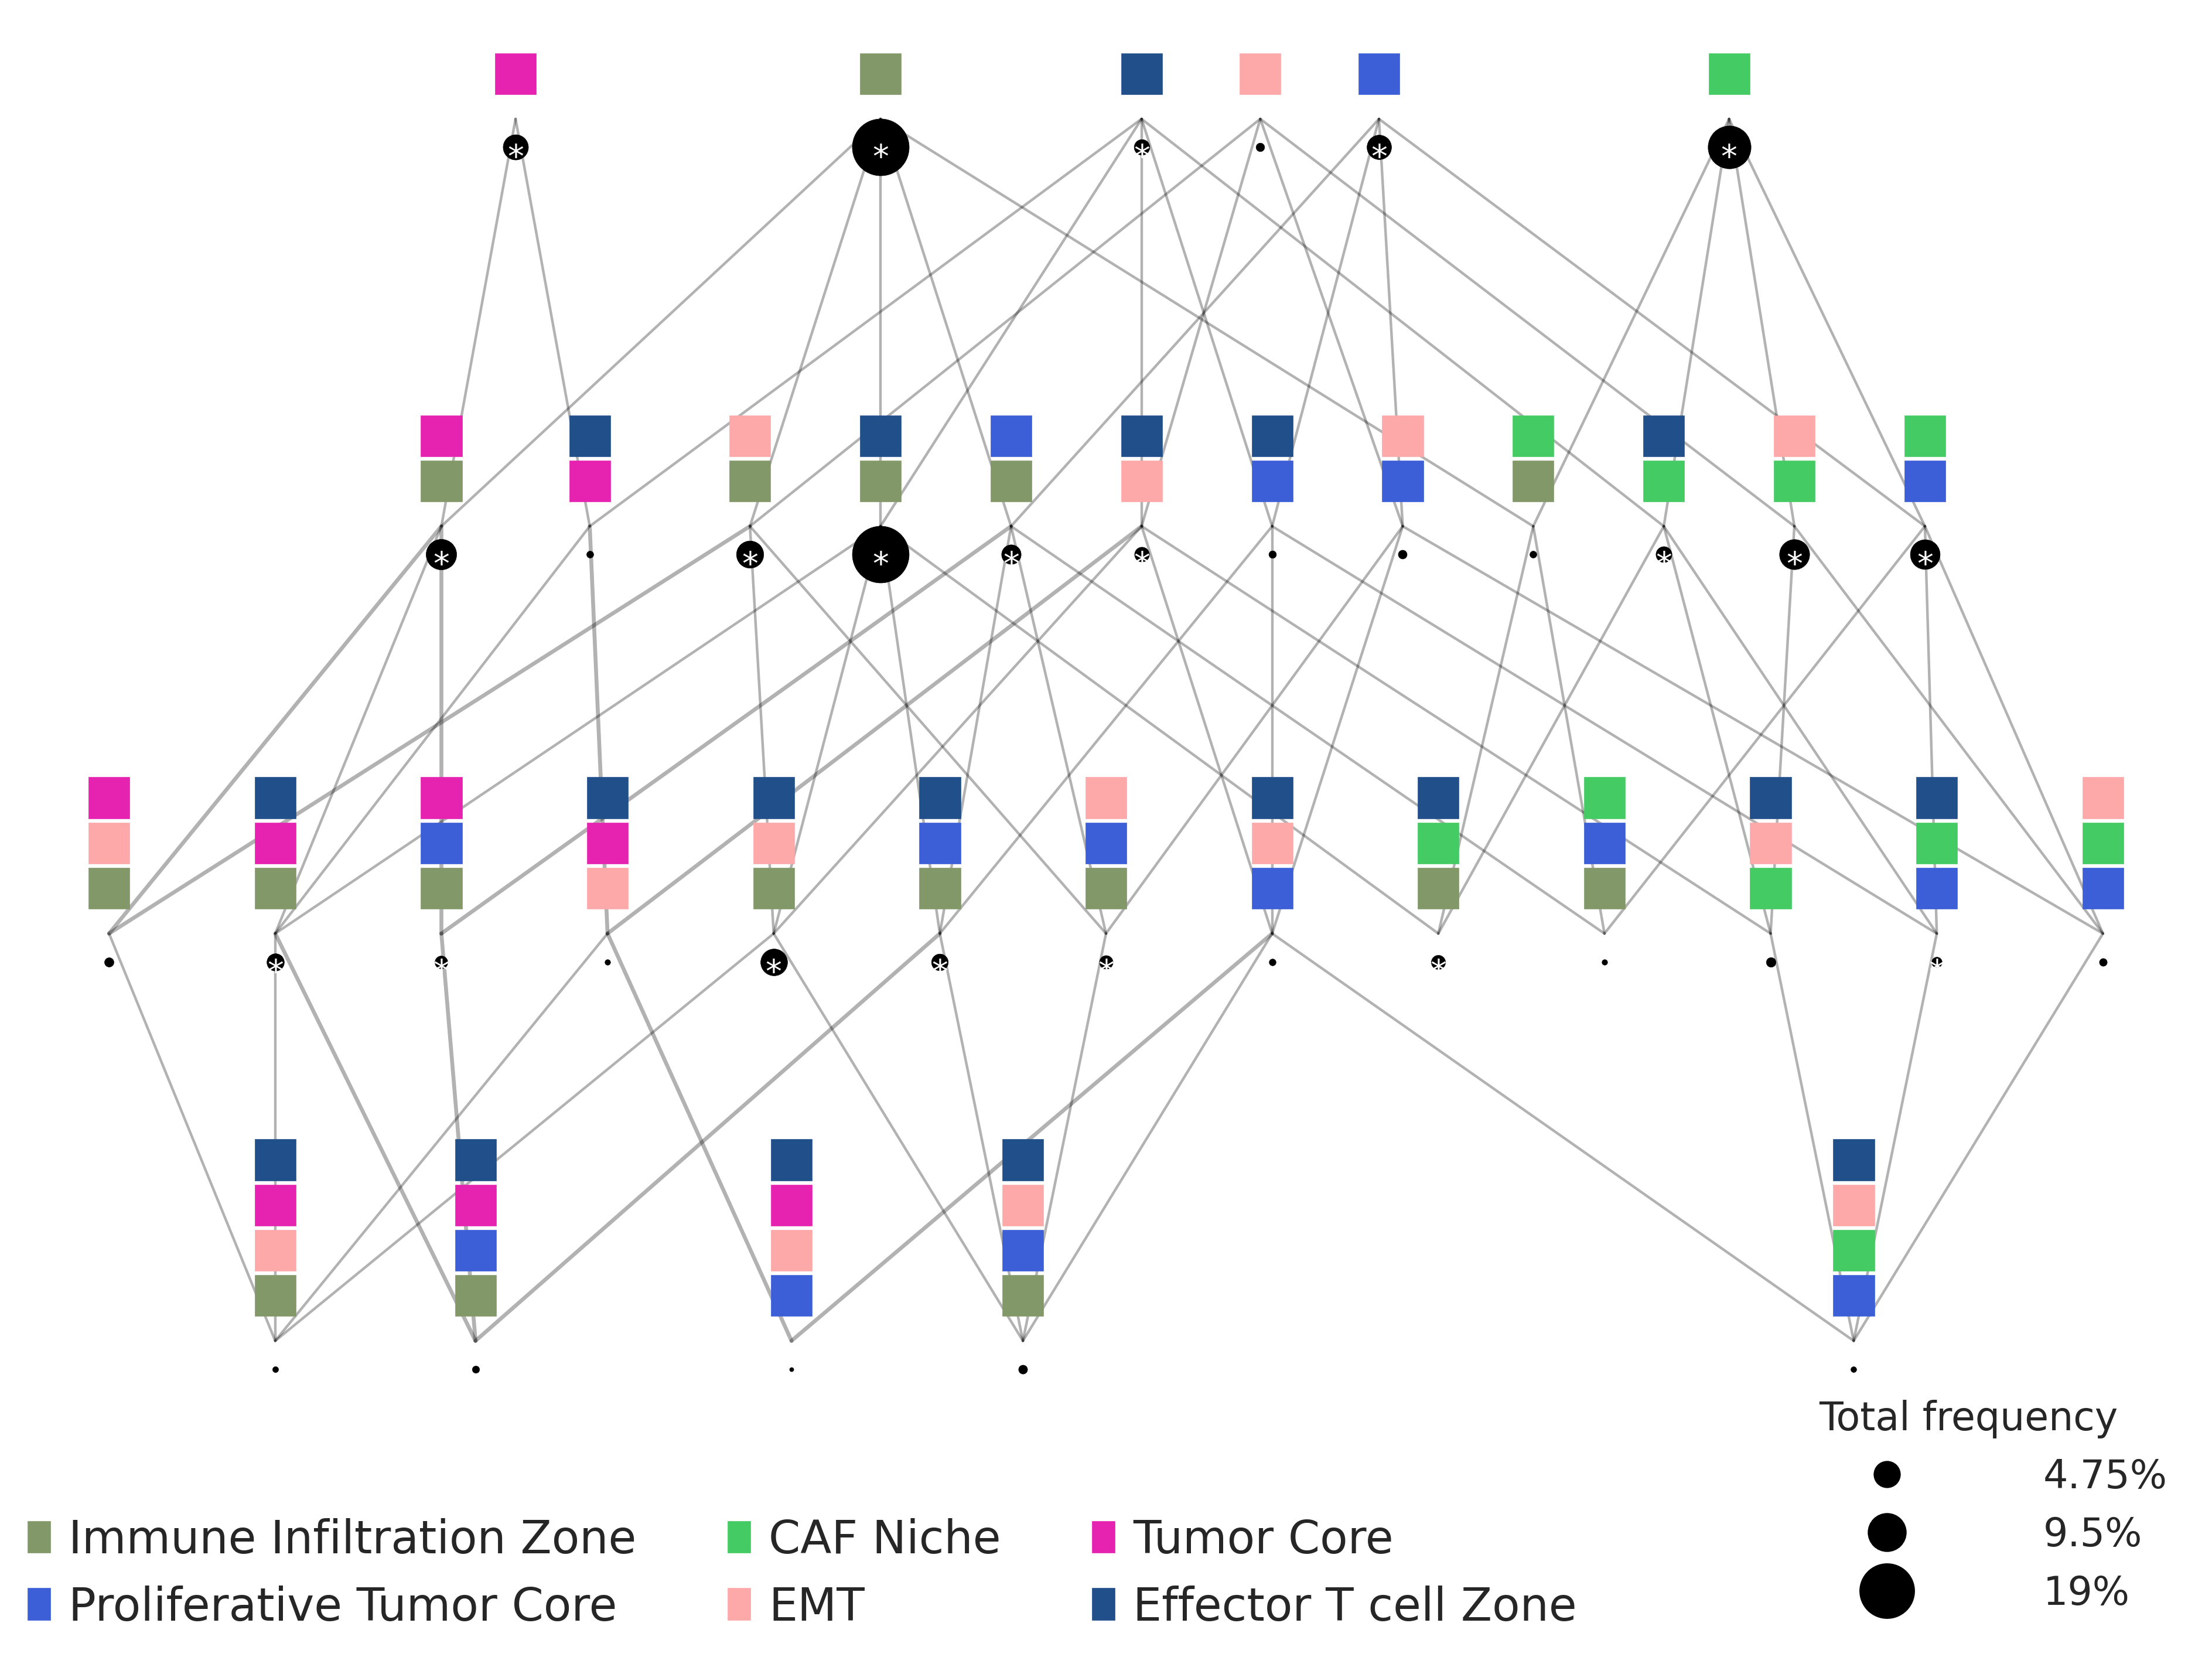

In [21]:
# Compute for the frequency of the CNs and paly around with the threshold
sp.pl.cn_map(cnmap_dict = cnmap_dict_liver, # dictionary from the previous step
        adata = adata_liver, # adata object
        cn_col = "CN_k20_n6_annot", # column with CNs used to color the plot
        palette = cn_annt_palette, # color dictionary
        figsize=(30, 20), # figure size
        savefig=True, # save figure as pdf
        output_fname = "cnmap_liver", # change it to file name you prefer when saving the figure
        output_dir= output_dir # specify output directory here (if savefig=True)
    )

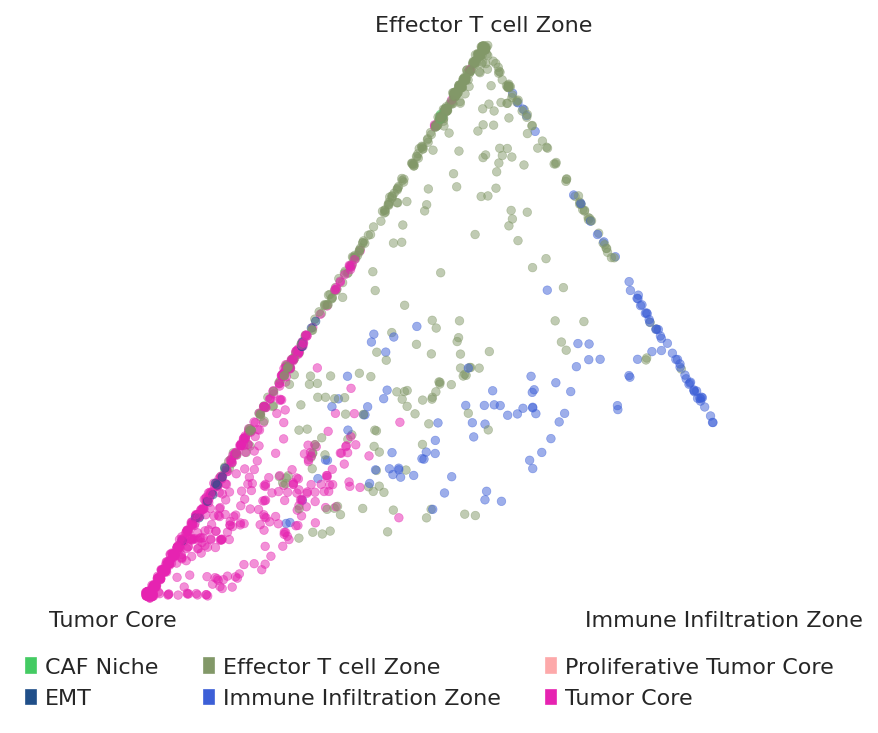

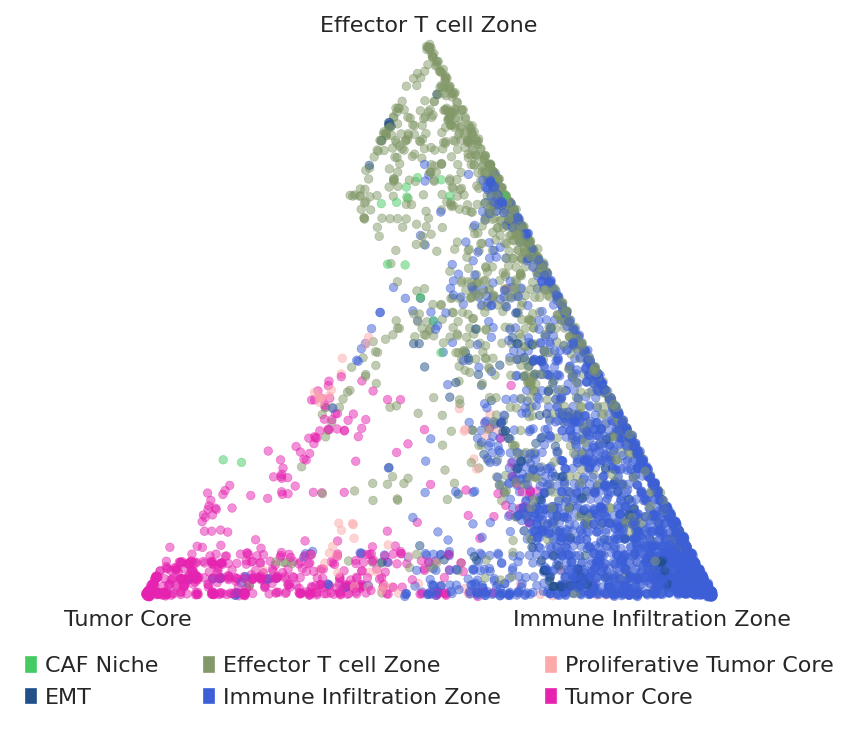

In [25]:
# plot barycentric projections for the tonsil and tonsillitis data

sp.pl.BC_projection(adata=adata_pancreas,
    cnmap_dict = cnmap_dict_pancreas, # dictionary from the previous step
    cn_col = "CN_k20_n6_annot", # column with CNs
    plot_list = ['Tumor Core', 'Effector T cell Zone', 'Immune Infiltration Zone'], # list of CNs to plot (three for the corners)
    cn_col_annt = "CN_k20_n6_annot", # column with CNs used to color the plot
    palette = None, # color dictionary
    figsize=(5, 5), # figure size
    rand_seed = 1, # random seed for reproducibility
    n_num = None, # number of neighbors
    threshold = 0.6) # threshold for percentage of cells in CN

sp.pl.BC_projection(adata=adata_liver,
    cnmap_dict = cnmap_dict_liver,
    cn_col = "CN_k20_n6_annot",
    plot_list = ['Tumor Core', 'Effector T cell Zone', 'Immune Infiltration Zone'],
    cn_col_annt = "CN_k20_n6_annot",
    palette = None,
    figsize=(5, 5),
    rand_seed = 1,
    n_num = None,
    threshold = 0.5)